Loading Test Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D
# from pyemma import msm
%matplotlib inline
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/training_set_VU_DM.csv", sep = ',')
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


Dataset Info

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   date_time                    object 
 2   site_id                      int64  
 3   visitor_location_country_id  int64  
 4   visitor_hist_starrating      float64
 5   visitor_hist_adr_usd         float64
 6   prop_country_id              int64  
 7   prop_id                      int64  
 8   prop_starrating              int64  
 9   prop_review_score            float64
 10  prop_brand_bool              int64  
 11  prop_location_score1         float64
 12  prop_location_score2         float64
 13  prop_log_historical_price    float64
 14  position                     int64  
 15  price_usd                    float64
 16  promotion_flag               int64  
 17  srch_destination_id          int64  
 18  srch_length_of_stay          int64  
 19  

In [0]:
df[df.booking_bool == 1]["prop_starrating"].mean()

3.3120601199508637

Number of unique seaarches:

In [0]:
df.srch_id.nunique()

199795

Number of Hotels:

In [0]:
df.prop_id.nunique()

129113

Number of countries from where user is searching:

In [0]:
df.visitor_location_country_id.nunique()

210

Number of countries from where hotels are found:

In [0]:
df.prop_country_id.nunique()

172

Country having the largest searches:

In [0]:
df.groupby(df.visitor_location_country_id)["srch_id"].nunique().nlargest(1)

visitor_location_country_id
219    114186
Name: srch_id, dtype: int64

Country code 219 has about 114186 unique searches. Largest among other countries.. Expect anomalies from here.

Countries having the largest hotels:

In [0]:
df.groupby(df.prop_country_id)["prop_id"].nunique().nlargest(1)

prop_country_id
219    38381
Name: prop_id, dtype: int64

Country code 219 again has about 38381 hotels. Largest among other countries.. Expect anomalies from here.

Clicked vs. Not Clicked Data:

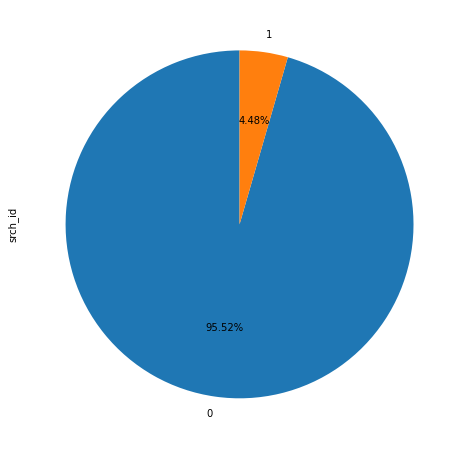

In [0]:
from pandas.plotting import table
plt.figure(figsize=(16,8))


#plot chart
df.groupby(df.click_bool)["srch_id"].sum().plot.pie(y='srch_id',figsize=(16, 8),autopct='%1.2f%%', startangle=90)
plt.show()

Booked vs. Clicked:

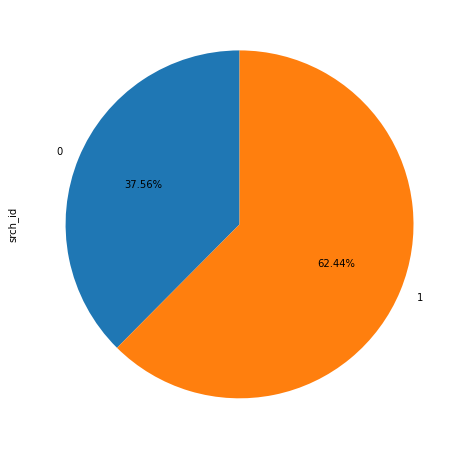

In [0]:
df[df.click_bool == 1].groupby(df.booking_bool)["srch_id"].sum().plot.pie(y='srch_id',figsize=(16, 8),autopct='%1.2f%%', startangle=90)
plt.show()

Column counts (large no of attributes have null values), mainly competition columns

In [0]:
df.count()

srch_id                        4958347
date_time                      4958347
site_id                        4958347
visitor_location_country_id    4958347
visitor_hist_starrating         251866
visitor_hist_adr_usd            252988
prop_country_id                4958347
prop_id                        4958347
prop_starrating                4958347
prop_review_score              4950983
prop_brand_bool                4958347
prop_location_score1           4958347
prop_location_score2           3867999
prop_log_historical_price      4958347
position                       4958347
price_usd                      4958347
promotion_flag                 4958347
srch_destination_id            4958347
srch_length_of_stay            4958347
srch_booking_window            4958347
srch_adults_count              4958347
srch_children_count            4958347
srch_room_count                4958347
srch_saturday_night_bool       4958347
srch_query_affinity_score       317406
orig_destination_distance

Null values share:

In [0]:
print("Null Cells: ",df.isnull().values.ravel().sum())
print("Non Null Cells: ",np.sum(df.count()))

Null Cells:  119733280
Non Null Cells:  148017458


44.71% of cells have null values.

Features with higher fraction of values missing

<BarContainer object of 54 artists>

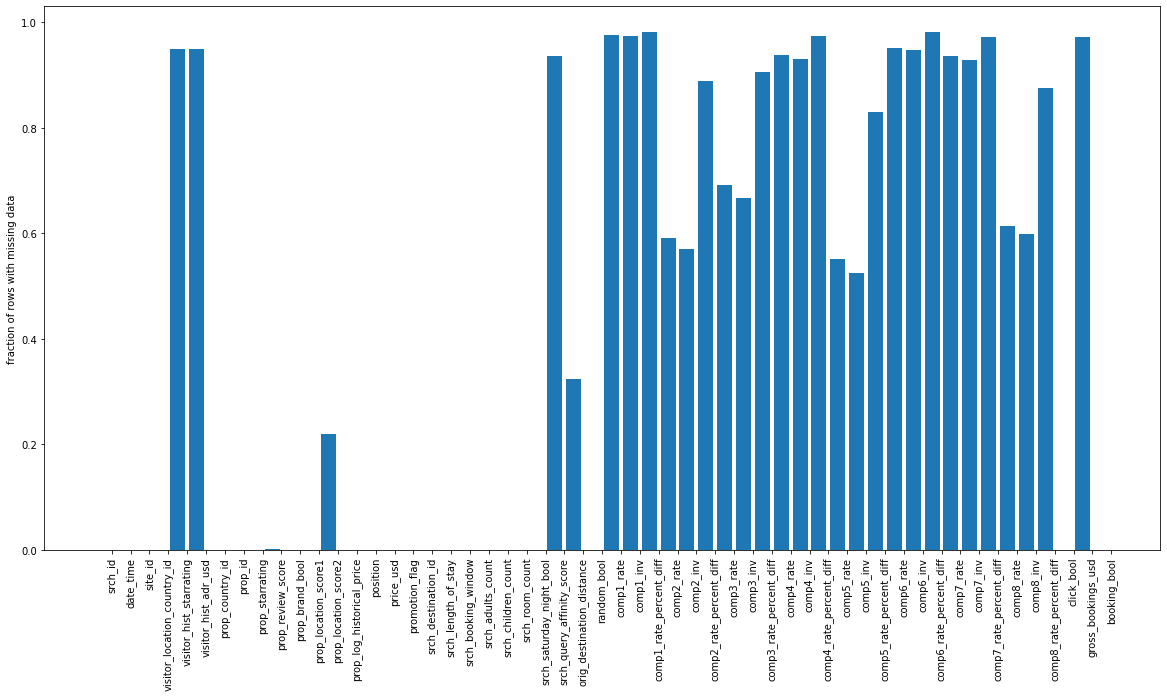

In [0]:
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(20,10))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

Attributes having null more than 50% cases:
* visitor_history_starrating
* visitor_hist_adr_usd
* srch_query_affinity_score
* comp scores
* gross_booking_usd





Correlation Matrix:

In [0]:
#df.corr()

Prices USD vs Length of Stay:

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


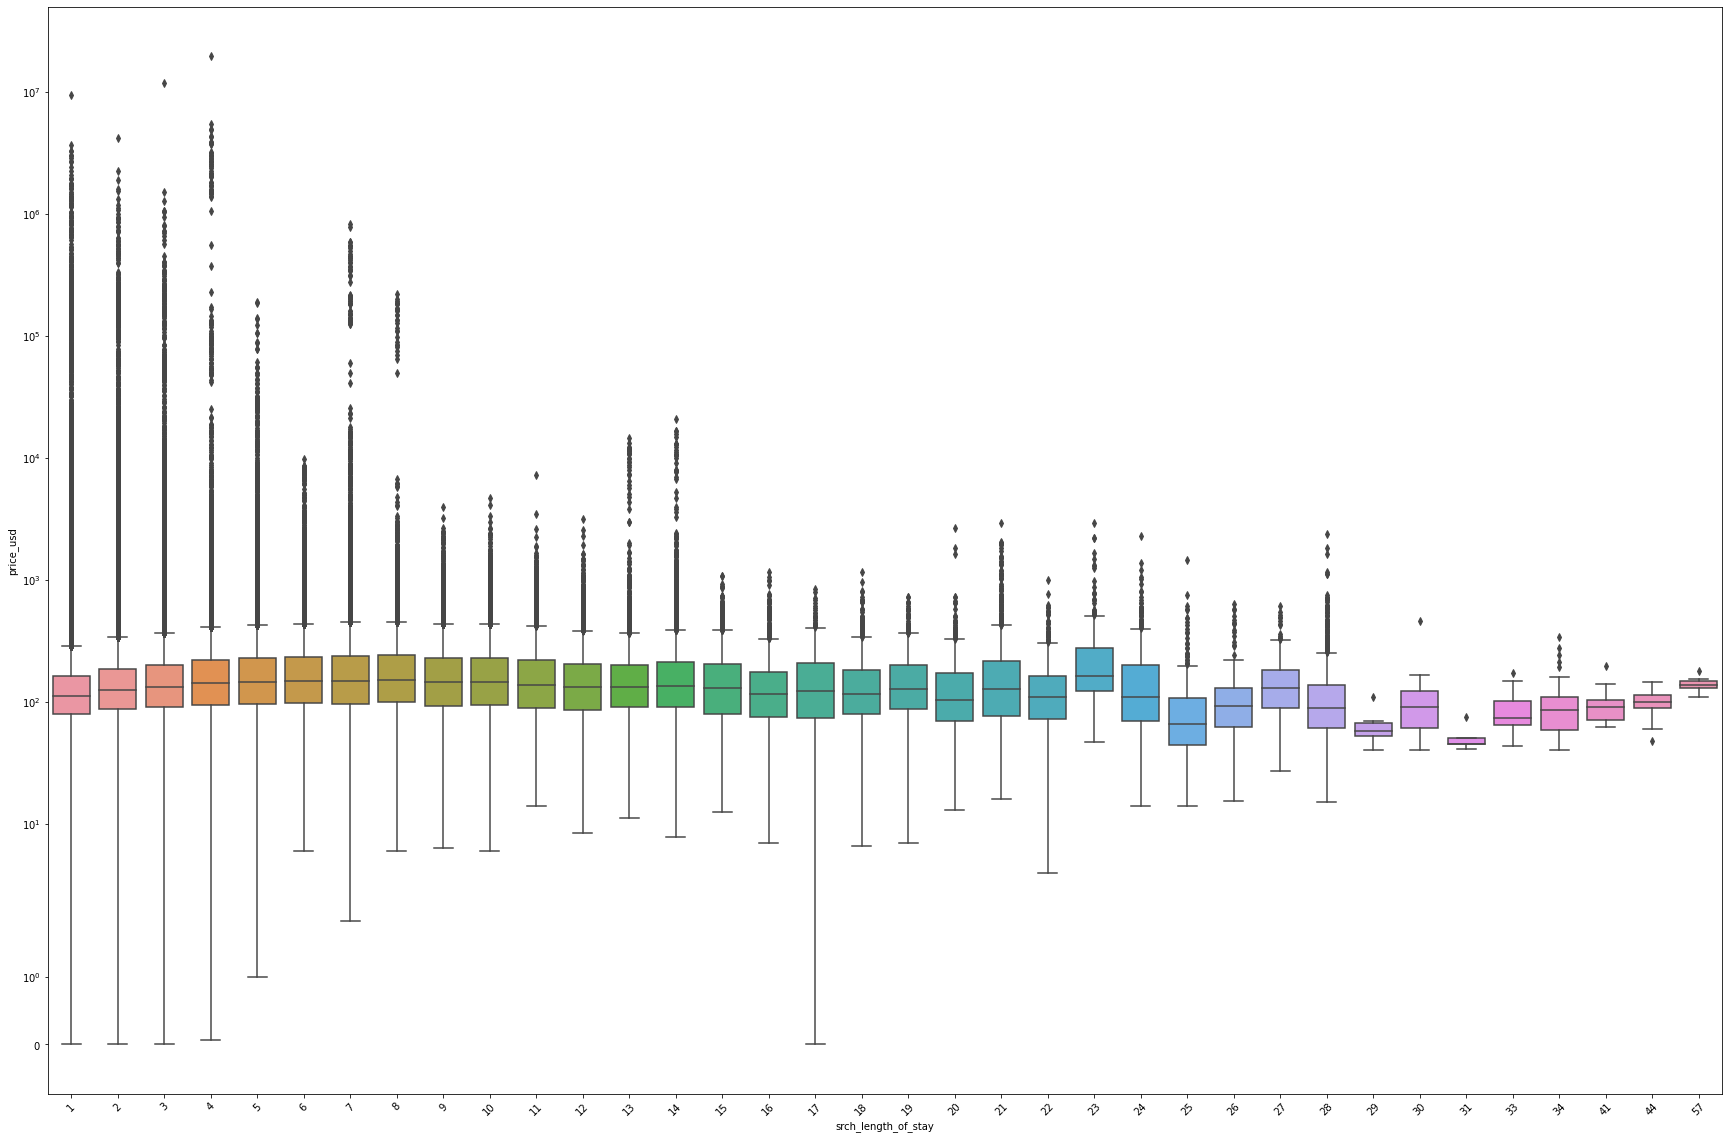

In [0]:
import seaborn as sns
fig, ax2= plt.subplots(figsize=(30, 20))
ax2.set_xlabel('Length of Stay') 
ax2.set_ylabel('Price USD (Logs)')
ax2.set_yscale('symlog')
plt.xticks(rotation=45)
sns.boxplot('srch_length_of_stay', 'price_usd', data=df, ax=ax2)

Outliers mostly occur for duration 1 night.

Checking the same with hotels booked scenario

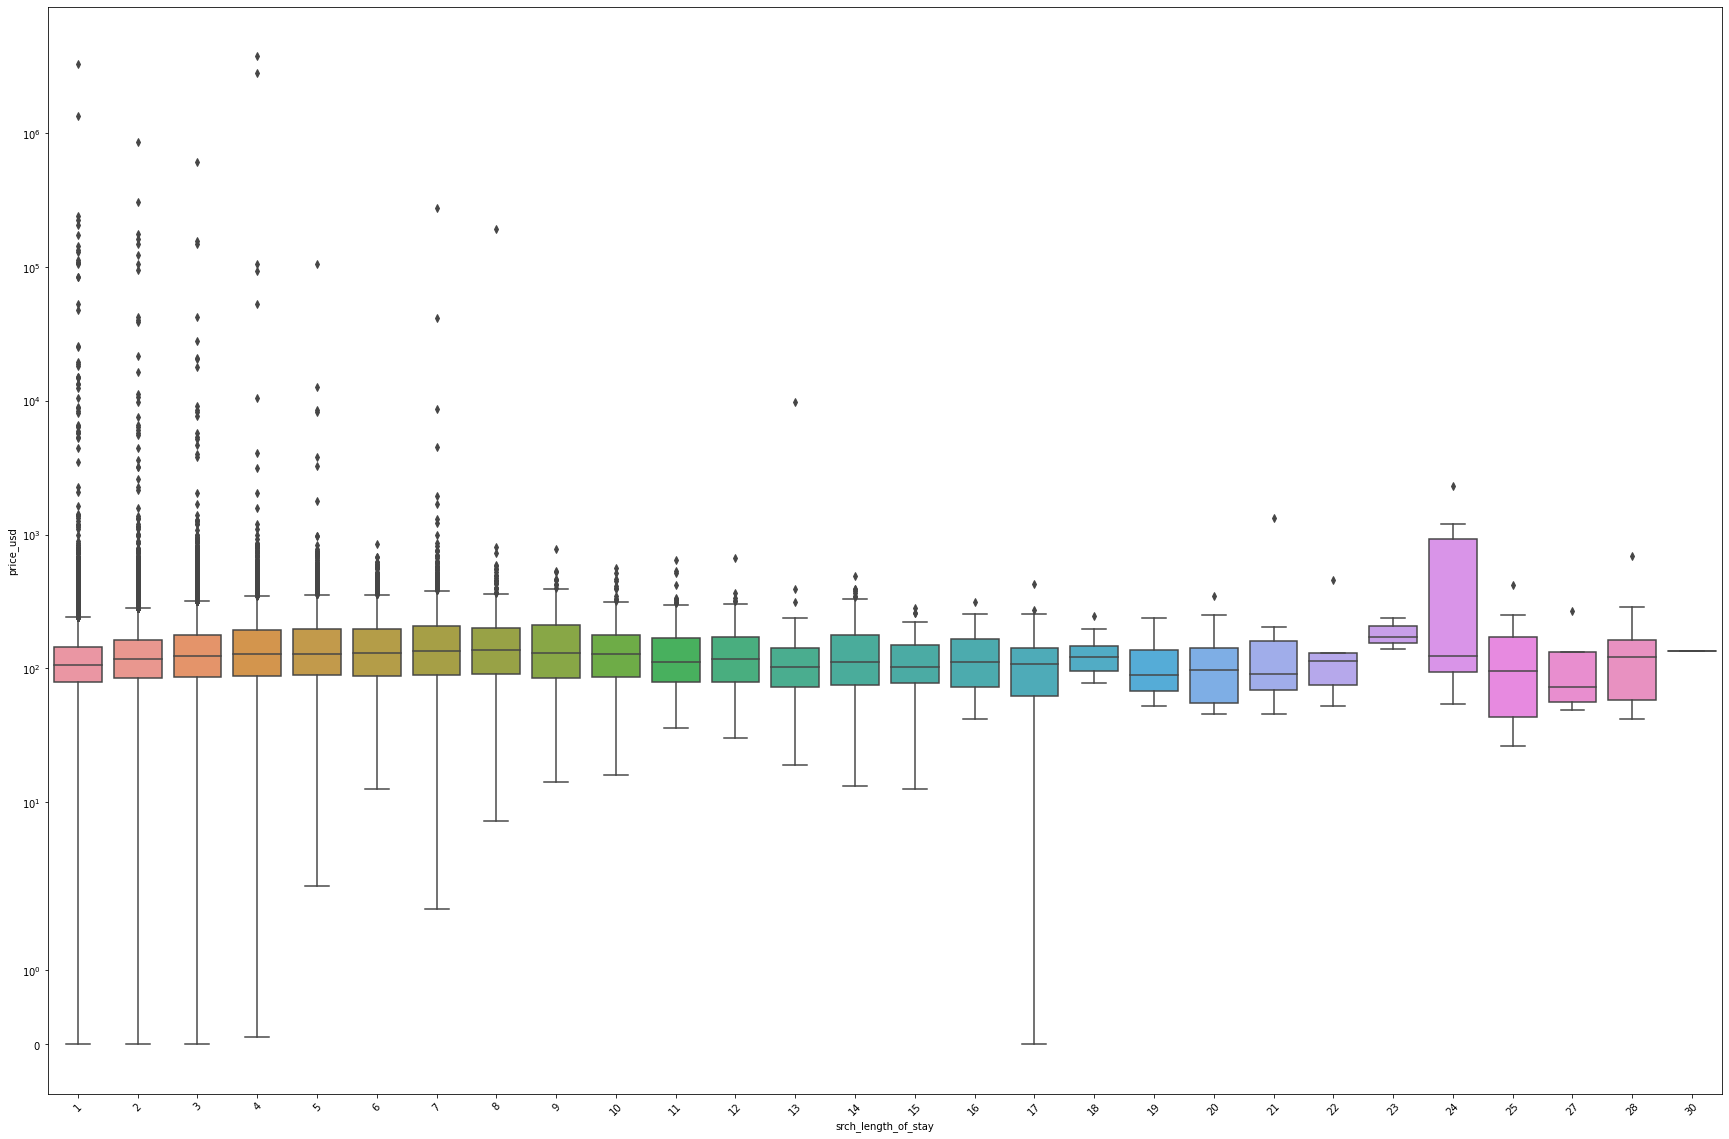

In [0]:
fig, ax2= plt.subplots(figsize=(30, 20))
ax2.set_xlabel('Length of Stay') 
ax2.set_ylabel('Price USD (Logs)')
ax2.set_yscale('symlog')
plt.xticks(rotation=45)
sns.boxplot('srch_length_of_stay', 'price_usd', data=df[df.booking_bool==1], ax=ax2)

Still 1 day has a lot 

Checking with countries grouped:

Text(0, 0.5, 'Density')

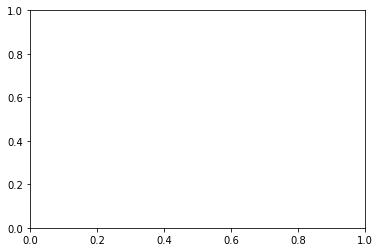

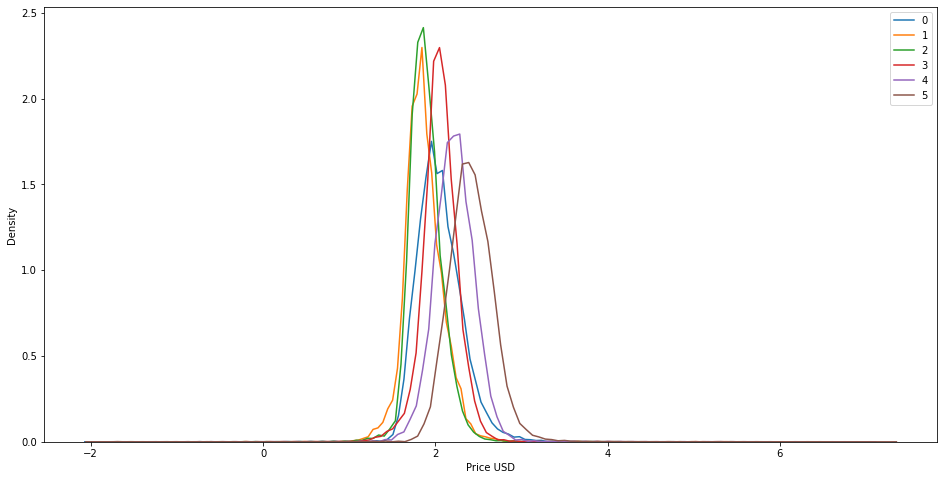

In [0]:
%matplotlib inline
# Initialize figure and ax
fig, ax = plt.subplots()
plt.figure(figsize=(16,8))
# this is to plot the kde
sns.kdeplot(np.log10(df.price_usd[(df.prop_starrating == 0.0) & (df.price_usd > 0)]),label='0');
sns.kdeplot(np.log10(df.price_usd[(df.prop_starrating == 1.0) & (df.price_usd > 0)]),label='1');
sns.kdeplot(np.log10(df.price_usd[(df.prop_starrating == 2.0) & (df.price_usd > 0)]),label='2');
sns.kdeplot(np.log10(df.price_usd[(df.prop_starrating == 3.0) & (df.price_usd > 0)]),label='3');
sns.kdeplot(np.log10(df.price_usd[(df.prop_starrating == 4.0) & (df.price_usd > 0)]),label='4');
sns.kdeplot(np.log10(df.price_usd[(df.prop_starrating == 5.0) & (df.price_usd > 0)]),label='5');

# beautifying the labels
plt.xlabel('Price USD')
plt.ylabel('Density')


9112
9869
11617
10517
12008
12759
0
0
0
0
8016
7954


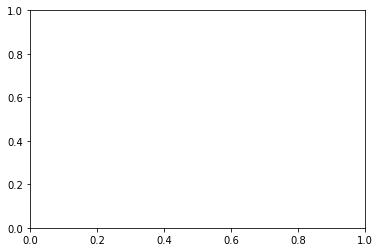

<Figure size 1152x576 with 0 Axes>

In [34]:
import seaborn as sns
%matplotlib inline
# Initialize figure and ax
fig, ax = plt.subplots()
plt.figure(figsize=(16,8))
# this is to plot the kde
#pandas.to_datetime(in_data[datetime_key])
#in_data["month"] = dates.dt.month
print(df["srch_id"][(df.visitor_location_country_id == 219) & (df.month == 1) & (df.booking_bool == 1)].nunique())
print(df["srch_id"][(df.visitor_location_country_id == 219) & (df.month == 2) & (df.booking_bool == 1)].nunique())
print(df["srch_id"][(df.visitor_location_country_id == 219) & (df.month == 3) & (df.booking_bool == 1)].nunique())
print(df["srch_id"][(df.visitor_location_country_id == 219) & (df.month == 4) & (df.booking_bool == 1)].nunique())
print(df["srch_id"][(df.visitor_location_country_id == 219) & (df.month == 5) & (df.booking_bool == 1)].nunique())
print(df["srch_id"][(df.visitor_location_country_id == 219) & (df.month == 6) & (df.booking_bool == 1)].nunique())
print(df["srch_id"][(df.visitor_location_country_id == 219) & (df.month == 7) & (df.booking_bool == 1)].nunique())
print(df["srch_id"][(df.visitor_location_country_id == 219) & (df.month == 8) & (df.booking_bool == 1)].nunique())
print(df["srch_id"][(df.visitor_location_country_id == 219) & (df.month == 9) & (df.booking_bool == 1)].nunique())
print(df["srch_id"][(df.visitor_location_country_id == 219) & (df.month == 10) & (df.booking_bool == 1)].nunique())
print(df["srch_id"][(df.visitor_location_country_id == 219) & (df.month == 11) & (df.booking_bool == 1)].nunique())
print(df["srch_id"][(df.visitor_location_country_id == 219) & (df.month == 12) & (df.booking_bool == 1)].nunique())
# df["month"] = pd.to_datetime(df["date_time"]).dt.month
# sns.kdeplot(df.month[(df.visitor_location_country_id != 219) & (df.booking_bool == 1)], label='Not 219');
# sns.kdeplot((df.month[(df.visitor_location_country_id == 219) & (df.booking_bool == 1)]), label='Is 219');
# sns.kdeplot((df.month),label='All');

# # beautifying the labels
# plt.xlabel('Price USD')
# plt.ylabel('Density')

In [21]:
df[df.srch_destination_id == 219].count()

srch_id                        0
date_time                      0
site_id                        0
visitor_location_country_id    0
visitor_hist_starrating        0
visitor_hist_adr_usd           0
prop_country_id                0
prop_id                        0
prop_starrating                0
prop_review_score              0
prop_brand_bool                0
prop_location_score1           0
prop_location_score2           0
prop_log_historical_price      0
position                       0
price_usd                      0
promotion_flag                 0
srch_destination_id            0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
srch_query_affinity_score      0
orig_destination_distance      0
random_bool                    0
comp1_rate                     0
comp1_inv                      0
comp1_rate_percent_diff        0
comp2_rate

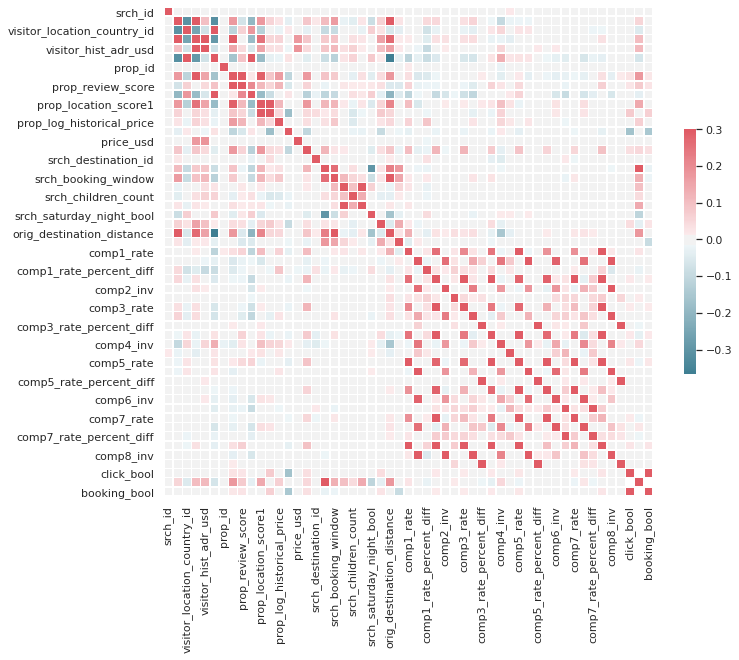

In [0]:
corr = df.corr(method ='pearson')
sns.set(style="white")
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [0]:
df.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
